<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_0_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n20.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.451876,92.599965,27.423374,0.039932,184.515146,184.476038,0.039108
1,0.0,1.0,45.825811,41.312247,48.488217,-0.030353,145.595921,145.620320,-0.024399
2,0.0,2.0,55.282006,42.706283,24.446871,0.007536,132.442695,132.432527,0.010169
3,0.0,3.0,31.658389,80.867925,30.539183,-0.018113,153.047384,153.064380,-0.016997
4,0.0,4.0,93.554001,81.869504,38.181306,0.014587,223.619398,223.604614,0.014784
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.704833,49.646001,97.802753,0.020313,218.173901,218.139687,0.034214
59996,999.0,56.0,79.070784,28.033689,23.446996,-0.070012,140.481458,140.541360,-0.059902
59997,999.0,57.0,79.514411,67.380003,42.770988,-0.003739,199.661663,199.669462,-0.007798
59998,999.0,58.0,26.523168,53.959887,93.139533,0.025954,183.648542,183.612799,0.035743


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.451876,92.599965,27.423374,0.039932,184.515146,184.476038,0.039108
1,0.0,1.0,45.825811,41.312247,48.488217,-0.030353,145.595921,145.620320,-0.024399
2,0.0,2.0,55.282006,42.706283,24.446871,0.007536,132.442695,132.432527,0.010169
3,0.0,3.0,31.658389,80.867925,30.539183,-0.018113,153.047384,153.064380,-0.016997
4,0.0,4.0,93.554001,81.869504,38.181306,0.014587,223.619398,223.604614,0.014784
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.704833,49.646001,97.802753,0.020313,218.173901,218.139687,0.034214
59996,999.0,56.0,79.070784,28.033689,23.446996,-0.070012,140.481458,140.541360,-0.059902
59997,999.0,57.0,79.514411,67.380003,42.770988,-0.003739,199.661663,199.669462,-0.007798
59998,999.0,58.0,26.523168,53.959887,93.139533,0.025954,183.648542,183.612799,0.035743


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    54.451876  92.599965  27.423374  ...  184.515146  184.476038  0.039108
      1.0    45.825811  41.312247  48.488217  ...  145.595921  145.620320 -0.024399
      2.0    55.282006  42.706283  24.446871  ...  132.442695  132.432527  0.010169
      3.0    31.658389  80.867925  30.539183  ...  153.047384  153.064380 -0.016997
      4.0    93.554001  81.869504  38.181306  ...  223.619398  223.604614  0.014784
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   60.704833  49.646001  97.802753  ...  218.173901  218.139687  0.034214
      56.0   79.070784  28.033689  23.446996  ...  140.481458  140.541360 -0.059902
      57.0   79.514411  67.380003  42.770988  ...  199.661663  199.669462 -0.007798
      58.0   26.523168  53.959887  93.139533  ...  183.648542  183.612799  0.035743
      59.0   37.357899  20.484346  42.519541  ...  110.403639  110.346103  0.057536

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    54.451876  92.599965  27.423374  ...  184.515146  184.476038  0.039108
      1.0    45.825811  41.312247  48.488217  ...  145.595921  145.620320 -0.024399
      2.0    55.282006  42.706283  24.446871  ...  132.442695  132.432527  0.010169
      3.0    31.658389  80.867925  30.539183  ...  153.047384  153.064380 -0.016997
      4.0    93.554001  81.869504  38.181306  ...  223.619398  223.604614  0.014784
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   60.704833  49.646001  97.802753  ...  218.173901  218.139687  0.034214
      56.0   79.070784  28.033689  23.446996  ...  140.481458  140.541360 -0.059902
      57.0   79.514411  67.380003  42.770988  ...  199.661663  199.669462 -0.007798
      58.0   26.523168  53.959887  93.139533  ...  183.648542  183.612799  0.035743
      59.0   37.357899  20.484346  42.519541  ...  110.403639  110.346103  0.057536

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.451876,92.599965,27.423374,0.039932,184.515146,184.476038,0.039108
1,0.0,1.0,45.825811,41.312247,48.488217,-0.030353,145.595921,145.620320,-0.024399
2,0.0,2.0,55.282006,42.706283,24.446871,0.007536,132.442695,132.432527,0.010169
3,0.0,3.0,31.658389,80.867925,30.539183,-0.018113,153.047384,153.064380,-0.016997
4,0.0,4.0,93.554001,81.869504,38.181306,0.014587,223.619398,223.604614,0.014784
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.704833,49.646001,97.802753,0.020313,218.173901,218.139687,0.034214
59996,999.0,56.0,79.070784,28.033689,23.446996,-0.070012,140.481458,140.541360,-0.059902
59997,999.0,57.0,79.514411,67.380003,42.770988,-0.003739,199.661663,199.669462,-0.007798
59998,999.0,58.0,26.523168,53.959887,93.139533,0.025954,183.648542,183.612799,0.035743


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    54.451876  92.599965  27.423374  ...  184.515146  184.476038  0.039108
      1.0    45.825811  41.312247  48.488217  ...  145.595921  145.620320 -0.024399
      2.0    55.282006  42.706283  24.446871  ...  132.442695  132.432527  0.010169
      3.0    31.658389  80.867925  30.539183  ...  153.047384  153.064380 -0.016997
      4.0    93.554001  81.869504  38.181306  ...  223.619398  223.604614  0.014784
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   60.704833  49.646001  97.802753  ...  218.173901  218.139687  0.034214
      56.0   79.070784  28.033689  23.446996  ...  140.481458  140.541360 -0.059902
      57.0   79.514411  67.380003  42.770988  ...  199.661663  199.669462 -0.007798
      58.0   26.523168  53.959887  93.139533  ...  183.648542  183.612799  0.035743
      59.0   37.357899  20.484346  42.519541  ...  110.403639  110.346103  0.057536

[60000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

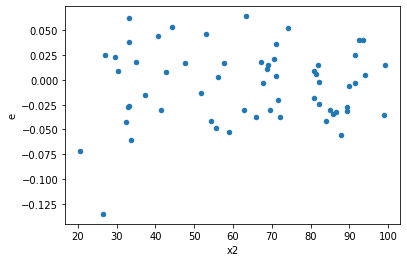

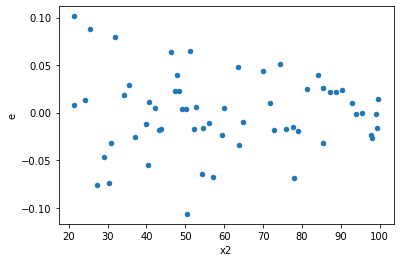

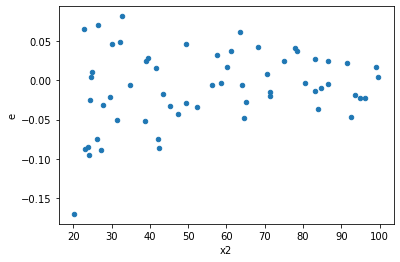

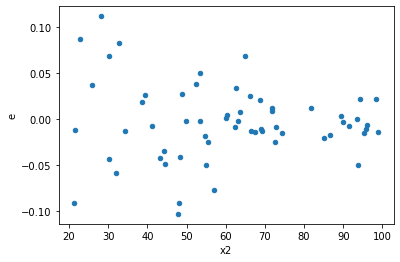

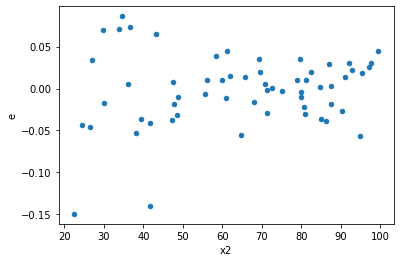

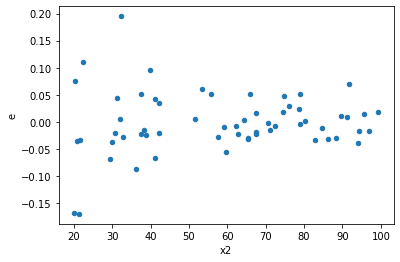

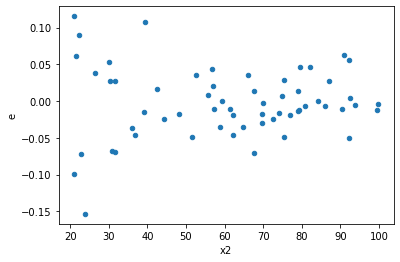

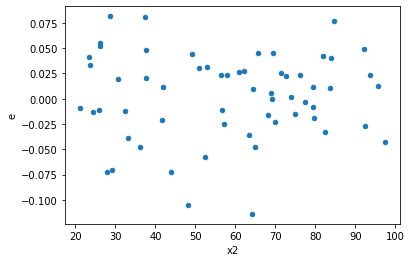

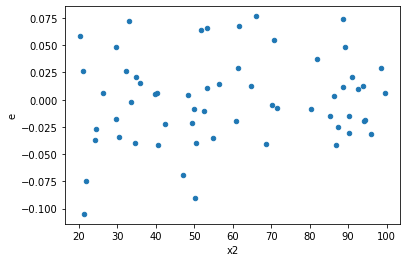

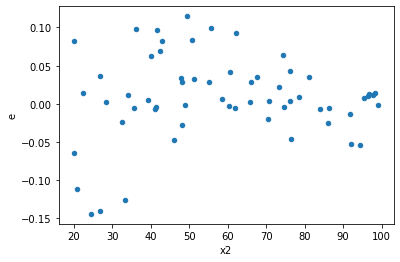

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
40.0,21.0,21.0,0.0288211424789055,0.020451434396359325,0.001441057123945275,0.0010225717198179662,1.409247973532659,0.4384147326654837,0.7807926336672582,Reject001=1 : Homoscedasticity
159.0,21.0,21.0,0.025275496226564,0.011594868088267986,0.0012637748113282,0.0005797434044133993,2.1798864837572807,0.0813183695078028,0.9593408152460986,Reject001=1 : Homoscedasticity
785.0,21.0,21.0,0.027954669749301376,0.01599752028036487,0.0013977334874650687,0.0007998760140182435,1.7474376815519677,0.20919166436783798,0.895404167816081,Reject001=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.019207350294569527,0.04570264149498833,0.0009603675147284764,0.0022851320747494163,0.42026783718126604,0.053162161475700374,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,0.016574931455940644,0.0449866042462029,0.0008287465727970322,0.002249330212310145,0.3684414890537032,0.026638560921740773,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,0.014622966972480502,0.0846699033840725,0.0007311483486240251,0.004233495169203625,0.17270560598314408,0.00016987270135130803,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,0.004946853783675301,0.07408412073661029,0.0002473426891837651,0.0037042060368305146,0.0667734695976584,4.770643420711442e-08,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,0.014817506182095038,0.07521939542687968,0.0007408753091047519,0.0037609697713439838,0.19699049823524636,0.0004588343911909085,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,0.015010093161299582,0.12408136172308536,0.0007505046580649791,0.006204068086154268,0.12096976494179586,9.513687866074603e-06,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,0.015319281760052894,0.08654908553627957,0.0007659640880026447,0.0043274542768139785,0.17700108169983345,0.000205157145540286,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,0.0189016648291194,0.057925164197735725,0.00094508324145597,0.0028962582098867864,0.3263118040476484,0.01334375697384258,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,0.02144440010755369,0.03813776919079756,0.0010722200053776844,0.001906888459539878,0.5622877415894612,0.19537088527366656,Reject001=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    692
Reject001=1 : Homoscedasticity      308
Name: Result_test, dtype: int64

In [18]:
result_show['Result_test'].sort_values()

Replicate
499.0    Reject001=0 : Heteroscedasticity
598.0    Reject001=0 : Heteroscedasticity
599.0    Reject001=0 : Heteroscedasticity
600.0    Reject001=0 : Heteroscedasticity
602.0    Reject001=0 : Heteroscedasticity
603.0    Reject001=0 : Heteroscedasticity
605.0    Reject001=0 : Heteroscedasticity
606.0    Reject001=0 : Heteroscedasticity
607.0    Reject001=0 : Heteroscedasticity
608.0    Reject001=0 : Heteroscedasticity
610.0    Reject001=0 : Heteroscedasticity
611.0    Reject001=0 : Heteroscedasticity
612.0    Reject001=0 : Heteroscedasticity
614.0    Reject001=0 : Heteroscedasticity
615.0    Reject001=0 : Heteroscedasticity
618.0    Reject001=0 : Heteroscedasticity
620.0    Reject001=0 : Heteroscedasticity
622.0    Reject001=0 : Heteroscedasticity
623.0    Reject001=0 : Heteroscedasticity
624.0    Reject001=0 : Heteroscedasticity
625.0    Reject001=0 : Heteroscedasticity
626.0    Reject001=0 : Heteroscedasticity
597.0    Reject001=0 : Heteroscedasticity
595.0    Reject001=0 : H